In [8]:
# Import sim functions
from neurodsp.sim import sim_powerlaw, sim_random_walk, sim_synaptic_current
from neurodsp.utils import set_random_seed

# Import function to compute power spectra
from neurodsp.spectral import compute_spectrum

# Import utilities for plotting data
from neurodsp.utils import create_times
from neurodsp.plts.spectral import plot_power_spectra
from neurodsp.plts.time_series import plot_time_series

import numpy as np
from scipy import io
import random

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")
from matplotlib.pyplot import figure

In [3]:
synaptic = []
n_seconds = 20
fs = 500
set_random_seed(0)

for i in range(0,2):
    # Set the random seed, for consistency simulating data
    syn_ap = sim_synaptic_current(n_seconds, fs,firing_rate=fr)
    fr = random.uniform(1.7,2.4)
#     print(fr)
     freqs, syn_psd = compute_spectrum(syn_ap, fs)

     plot_power_spectra(freqs, [syn_psd], ['Synaptic'])
    synaptic.append(syn_ap.tolist())
    
synaptic = np.array(synaptic)
synaptic.shape

IndentationError: unexpected indent (<ipython-input-3-f5362eea289d>, line 11)

In [16]:
data={'synaptic':synaptic}
io.savemat('synaptic.mat',data)

In [13]:
linear = []
n_seconds = 20
fs = 500
linear_psd = []
set_random_seed(0)

for i in range(0,200):
    # Set the random seed, for consistency simulating data
    set_random_seed(0)
    br_noise = sim_powerlaw(n_seconds, fs, -2)
    linear.append(br_noise.tolist())
    
linear = np.array(linear)
linear.shape

(200, 10000)

In [14]:
data={'linear':linear}
io.savemat('linear.mat',data)

In [5]:
# Start with white noise signal, that we will rotate, in frequency space
sig = np.random.randn(10000)

# Compute the FFT
fft_output = np.fft.fft(sig)
freqs = np.fft.fftfreq(len(sig), 1. / 500)

In [6]:
from neurodsp.spectral import rotate_powerlaw

In [7]:
fft_output_rot = rotate_powerlaw(freqs, fft_output, -2/2)
sig = zscore(np.real(np.fft.ifft(fft_output_rot)))

NameError: name 'zscore' is not defined

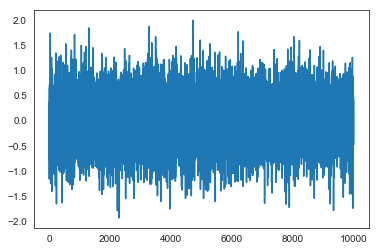

In [10]:
plt.plot(sig/2)

In [28]:
zscore

NameError: name 'zscore' is not defined